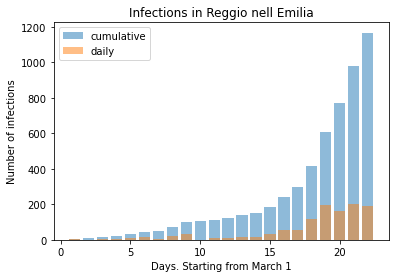

In [1]:
import requests
import csv
from io import StringIO
import datetime as dt
from typing import List
import matplotlib.pyplot as plt
from tkinter import *

ROOT_PROVINCE = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-"
START_DATE_STR = "20200301"

def build_urls_province():  
    urls = []
    date = dt.datetime.strptime(START_DATE_STR, '%Y%m%d')
    today = dt.datetime.today()
    delta_days = (today - date).days
    for ind in range(0, delta_days):
        date_str =  dt.datetime.strftime(date, '%Y%m%d')
        urls = urls + [ROOT_PROVINCE + date_str + '.csv']
        # date plus 1 day
        date = date + dt.timedelta(days=1)
    return urls
    
def get_province_cases(urls, prov):
    cases: List[int] = []
    for url in urls:
        session = requests.Session()
        resp = session.get(url)
        text = resp.text
        buff = StringIO(text)
        rd = csv.reader(buff)
        for rw in rd:
            cur_prov = rw[5]
            cur_prov = cur_prov.replace("'", " ")
            if cur_prov == prov:
                cases = cases + [int(rw[9])]
                #print(f"{city}, cases: {cases}")
    return cases
                
def get_daily(cases):
    first = cases[0]
    daily = [first]
    tail = cases[1:len(cases)]
    for ind, item in enumerate(tail):
        daily = daily + [item - cases[ind]]
    return daily


prov = ''

root = Tk()
menu = Menu(root) 
OptionList = ["Bologna", "Modena", "Reggio nell Emilia", "Roma"]
variable = StringVar(root)
variable.set(OptionList[0])
opt = OptionMenu(root, variable, *OptionList)
opt.pack()
root.mainloop()

prov = variable.get()

urls = build_urls_province()

cases = get_province_cases(urls, prov)
#cases = [2, 3, 6, 11, 19, 41, 49, 62, 80, 86, 108, 122, 155, 195, 230, 291, 333, 395, 465, 552, 610, 674]
x_axis = [x for x in range(1, len(cases) + 1)]

daily= get_daily(cases)
#print(cases)
#print(daily)
plt.bar(x_axis, cases, align='center', alpha=0.5, label = "cumulative")
plt.bar(x_axis, daily, align='center', alpha=0.5, label = "daily")
plt.legend()
plt.title("Infections in " + prov)
plt.xlabel("Days. Starting from March 1")
plt.ylabel("Number of infections")
plt.show()

